In [45]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

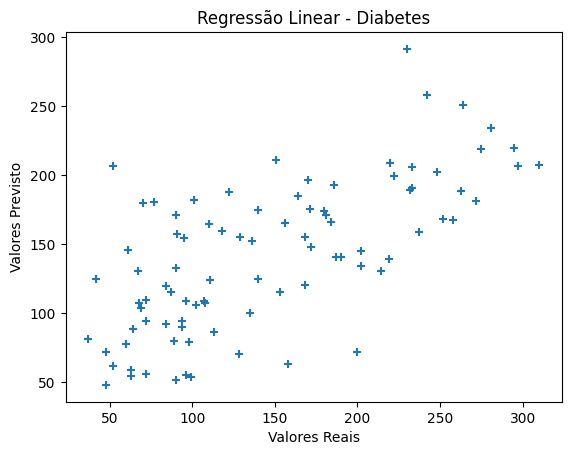

In [10]:
# Carregando o dataset de diabetes
diabetes = load_diabetes(as_frame = True)

# dividindo os dados em conjuntos de treino e teste

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.2, random_state = 42)

# Criando o modelo de regressão linear
lr = LinearRegression()

# Treinando o modelo com os dados de treino
lr.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = lr.predict(X_test)

# Plotando os resultados

plt.scatter(y_test, y_pred, marker = '+')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previsto')
plt.title('Regressão Linear - Diabetes')
plt.show()

Nesse exemplo, o dataset diabetes é carregado utilizando a função load_diabetes do Scikit-learn, e os dados são armazenados na variável diabetes. Em seguida, os dados são divididos em conjuntos de treino e teste utilizando a função train_test_split, onde 80% dos dados são utilizados para treino e 20% para teste. Uma instância do modelo de regressão linear é criada utilizando a classe LinearRegression, e o modelo é treinado utilizando o método fit com os dados de treino. Em seguida, o modelo é utilizado para fazer previsões com os dados de teste utilizando o método predict.

Finalmente, plotamos os resultados da previsão em um gráfico de dispersão, comparando os valores reais com os valores previstos.

A regressão linear é uma técnica bastante útil em problemas de previsão e pode ser utilizada em diferentes áreas, como finanças, engenharia, marketing, entre outras. No exemplo acima, utilizamos o dataset diabetes para prever a progressão da doença com base em características como idade, sexo, índice de massa corporal, pressão arterial, entre outras.

In [4]:
dados = pd.DataFrame({
    'X' : [1, 2, 3, 4, 5],
    'Y' : [1.3, 1.8, 3.5, 4, 4.6]
})
dados.head()

,X,Y
0,1,1.3
1,2,1.8
2,3,3.5
3,4,4.0
4,5,4.6


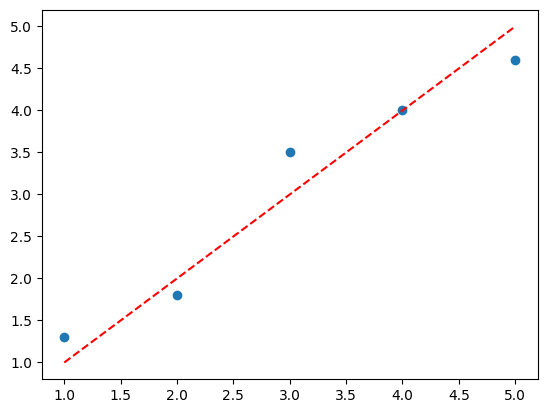

In [12]:
fig, ax = plt.subplots()

ax.scatter(dados.X, dados.Y)
ax.plot(dados.X, dados.y_reta, '--r')
plt.show()

In [ ]:
# importar o modelo de regressão linear e depois crirar o modelo de regessão
reg = LinearRegression().fit(dados.X.values.reshape(-1, 1), dados.Y) #adicionar os valores de X e Y Obs. values.reshape(-1, 1) transforma os valores de X em uma matriz coluna, ignorando os indices

In [25]:
# Coeficiente angular (slope) da reta de regressão
a = reg.coef_

In [26]:
# Coeficiente linear (intercept) da reta de regressão
b = reg.intercept_

In [ ]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(dados.X, dados.Y)
ax.plot(dados.X, dados.y_reta, '--r')

x = dados.X.values
y = a*x+b               # Melhor reta que se ajusta aos dados


plt.plot(x, y)  # plotando a reta de regressão
plt.show()

In [29]:
dados['y_pred'] = reg.predict(dados.X.values.reshape(-1, 1))

In [50]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

casas = pd.DataFrame(data.data)
casas.columns = data.feature_names
casas['MedHouseVal'] = data.target

In [51]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [41]:
# Regressão Linear Simples

X = casas.MedInc
y = casas.MedHouseVal

In [42]:
# Separando os dados em treino e teste
# OBS. Não esquecer de importar a função train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Usando a regressão linear
reg = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

In [46]:
# Avaliando o Erro
y_pred = reg.predict(X_test.values.reshape(-1, 1))

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6265986453094173
0.7028461448540976


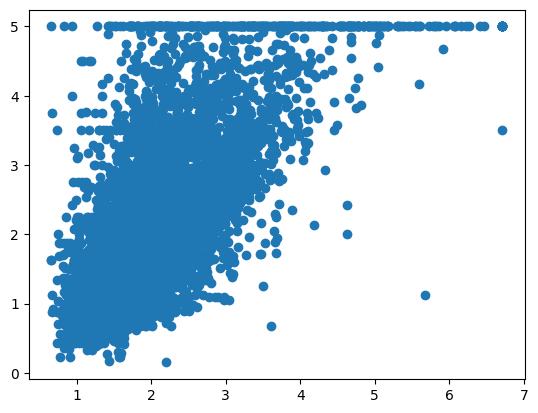

In [48]:
# Visualizando a relação do y_test com o y_pred

fig, ax = plt.subplots()

ax.scatter(y_pred, y_test)

plt.show()

In [ ]:
# Regressão Linear Múltipla

# Será separado os valores de X e Y

X = casas[['MedInc', 'AveBedrms']]
y = casas.MedHouseVal

# Separando os dados em treino e teste novamente

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Usando a regressão linear novamente
# OBS. Nesse caso como já existe duas colunas em X, não é necessário fazer o reshape

reg = LinearRegression().fit(X_train, y_train)

# Tambem haverá o reg.coef_ e o reg.intercept_
print(reg.coef_)
print(reg.intercept_)

# Avaliando o Erro novamente usando a mesma lógica, da mesma forma, não é necessário fazer o reshape

y_pred = reg.predict(X_test)

[0.41732849 0.00059442]
0.44810749063254995


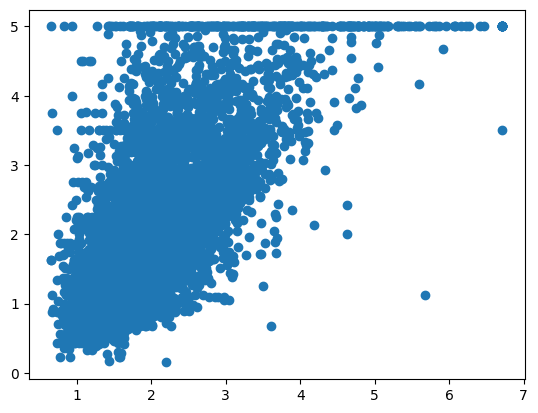

In [53]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
plt.show()